In [122]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [123]:
# Define the number of samples (rows) to generate for the synthetic dataset
n = 100

# Create a DataFrame with synthetic data using pandas
train_data = pd.DataFrame(data=dict(
    x=np.linspace(0, 1, n),         # Generate 'x' values evenly spaced between 0 and 1
    y=np.random.rand(n),            # Generate 'y' values as random floats between 0 and 1
    target=np.random.randint(1, 8, n)  # Generate 'target' values as random integers from 1 to 7 (inclusive)
))


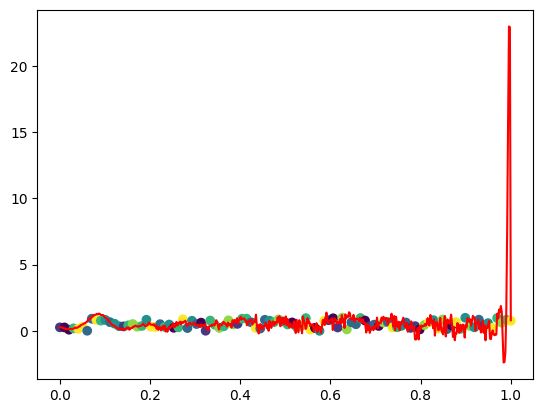

In [124]:
from sklearn.linear_model import LinearRegression  # Import Linear Regression model from sklearn

# Function to create sine-based features for the input x
def create_sin_features(x, num_features):

    # Create a list of sine-transformed features for frequencies 1 to num_features
    features = [np.sin(f * x) for f in range(1, num_features + 1)]
    
    # Stack features vertically and transpose to get the desired shape (n_samples, num_features)
    return np.vstack(features).T

# Create sine-transformed features for the training data based on the 'x' column
x_features = create_sin_features(train_data["x"], n)

# Initialize a Linear Regression model
model = LinearRegression()

# Fit the Linear Regression model using the sine-transformed features and 'y' column as target
model.fit(x_features, train_data["y"])

# Generate predictions using the fitted model on new sine-transformed features
# The predictions are made for 500 evenly spaced points between 0 and 1
y_pred = model.predict(create_sin_features(np.linspace(0, 1, 500), n))

# Plot the original data and the fitted curve
plt.scatter(train_data["x"], train_data["y"], c=train_data["target"], label="Training Data")  # Scatter plot of training data
plt.plot(np.linspace(0, 1, 500), y_pred, c="red", label="Fitted Curve")  # Plot the fitted curve
plt.legend()  # Add legend for clarity
plt.show()  # Display the plot

c:\Users\ms216u.MUCLVAD1\OneDrive - Linde Group\Studium\Semester 5\AAML\Übungen\venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ms216u.MUCLVAD1\OneDrive - Linde Group\Studium\Semester 5\AAML\Übungen\venv\Lib\site-packages\numpy\ma\core.py:3448: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\Users\ms216u.MUCLVAD1\OneDrive - Linde Group\Studium\Semester 5\AAML\Übungen\venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


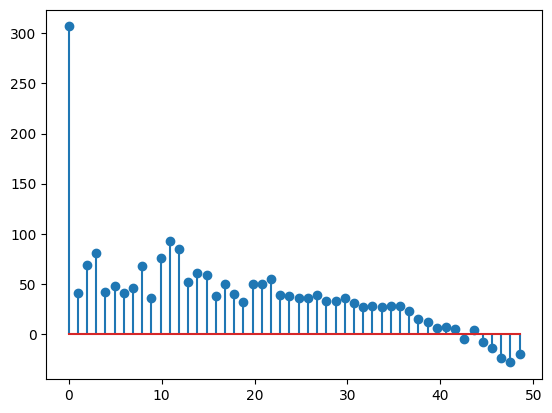

In [125]:
from scipy.fft import fft, fftfreq  # Import Fast Fourier Transform (FFT) and frequency functions from scipy

# Apply Fast Fourier Transform (FFT) to the predicted values
yf = fft(y_pred)  # Compute the FFT of the predicted y values (frequency domain representation)

# Compute the frequency bins for the FFT
# 'n' is the number of samples, and 'd' is the spacing between consecutive x values
xf = fftfreq(n, d=(train_data["x"][1] - train_data["x"][0]))

# Retain only the positive frequencies
xf = xf[:n // 2]  # Keep only the first half (positive frequencies)
yf = yf[:n // 2]  # Match the size of the positive frequencies with the transformed data

# Plot the magnitude spectrum of the FFT
plt.stem(xf, np.abs(yf), basefmt=" ", use_line_collection=True)  # Use stem plot to visualize frequencies
plt.xlabel("Frequency")  # Label for x-axis
plt.ylabel("Magnitude")  # Label for y-axis
plt.title("FFT of Predicted Values")  # Title for the plot
plt.show()  # Display the plot

In [126]:
# Identify the indices of the frequencies sorted by their magnitude in ascending order
dominant_idx = np.argsort(yf)  # Sort the indices of 'yf' based on the magnitude of the FFT values

# Use the sorted indices to reorder the frequencies in ascending order of magnitude
dominant_freq = xf[dominant_idx]  # Map the sorted indices to the corresponding frequencies in 'xf'

# Print all frequencies, sorted by their magnitude
# `xf[np.argsort(yf)]` ensures frequencies are listed in the same order as the sorted FFT values
print(f"alle {len(xf)} frequenzen: {xf[np.argsort(yf)]}")


alle 50 frequenzen: [47.52 46.53 48.51 45.54 44.55 42.57 43.56 41.58 39.6  40.59 38.61 37.62
 36.63 31.68 33.66 32.67 35.64 34.65 30.69 18.81 27.72 28.71 25.74 29.7
 24.75  8.91 23.76 15.84 26.73 22.77 17.82  0.99  5.94  3.96  6.93  4.95
 20.79 19.8  16.83 12.87 21.78 14.85 13.86  7.92  1.98  9.9   2.97 11.88
 10.89  0.  ]


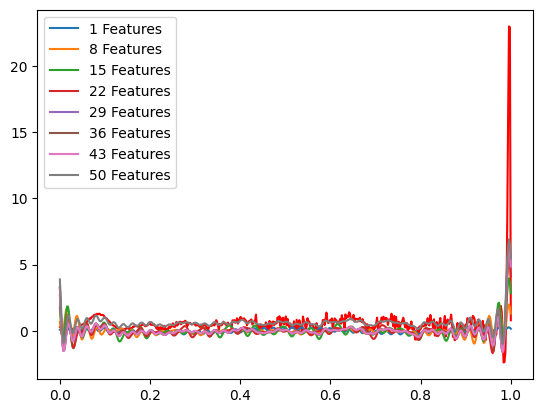

In [127]:
# Plot the original predicted values (y_pred) as a red line
plt.plot(np.linspace(0, 1, 500), y_pred, c="red", label="Original Prediction")

from scipy.fft import ifft  # Import inverse FFT (iFFT) function to reconstruct the signal

# Loop to incrementally reconstruct the signal using subsets of dominant frequencies
for idx in range(1, len(dominant_idx), 7):  # Process every 7th dominant frequency
    # Select the top 'idx' dominant frequency indices
    didx = dominant_idx[:idx]

    # Create a filtered frequency spectrum with only the selected frequencies
    filtered_yf = np.zeros_like(yf)  # Initialize a zero-filled array with the same shape as 'yf'
    filtered_yf[didx] = yf[didx]     # Retain the FFT values for the selected positive frequencies
    filtered_yf[-didx] = yf[-didx]  # Retain the corresponding negative frequencies (mirroring)

    # Perform the inverse FFT (iFFT) to reconstruct the signal from the filtered spectrum
    y_ifft = np.real(ifft(filtered_yf, 500))  # Compute the real part of the inverse FFT

    # Plot the reconstructed signal for the current set of dominant frequencies
    plt.plot(np.linspace(0, 1, 500), y_ifft, label=f"{len(didx)} Features")

# Final reconstruction using all dominant frequencies
didx = dominant_idx  # Select all dominant frequencies

# Create the final filtered frequency spectrum
filtered_yf = np.zeros_like(yf)  # Initialize zero-filled array
filtered_yf[didx] = yf[didx]     # Retain FFT values for all dominant frequencies
filtered_yf[-didx] = yf[-didx]   # Retain corresponding negative frequencies

# Perform the inverse FFT (iFFT) for full signal reconstruction
y_ifft = np.real(ifft(filtered_yf, 500))  # Compute the real part of the inverse FFT

# Plot the fully reconstructed signal
plt.plot(np.linspace(0, 1, 500), y_ifft, label=f"{len(didx)} Features")

# Add legend to distinguish between the different reconstructions
plt.legend()

# Display the plot
plt.show()
